# Logistic Regression

In [3]:
# import library packages
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load given Dataset
data=pd.read_csv('Maternal_Health.csv')

In [6]:
df=data.dropna()

In [7]:
df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [8]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [9]:
from sklearn.preprocessing import LabelEncoder
var=['RiskLevel']
label=LabelEncoder()
for i in var:
    df[i]=label.fit_transform(df[i]).astype(int)

In [10]:
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,0
1,35,140,90,13.0,98.0,70,0
2,29,90,70,8.0,100.0,80,0
3,30,140,85,7.0,98.0,70,0
4,35,120,60,6.1,98.0,76,1


In [11]:
# Preprocessing, split test and dataset, split response variable
X=df.drop(labels='RiskLevel',axis=1)
# Response Variable
y=df.loc[:,'RiskLevel']

In [12]:
# Splitting for Train and Test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42,stratify=y)
print('Number of Training Dataset:',len(X_train))
print('Number of Test Dataset:',len(X_test))
print('Total Number of Dataset:',len(X_train)+len(X_test))

Number of Training Dataset: 709
Number of Test Dataset: 305
Total Number of Dataset: 1014


In [14]:
# Implementing Hist Gradient Boosting Classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

In [15]:
# Training
LR=LogisticRegression()
LR.fit(X_train,y_train)
predicted=LR.predict(X_test)
predicted_Train=LR.predict(X_train)

In [17]:
# Finding Accuracy
accuracy=accuracy_score(y_test,predicted)
print('Testing Accuracy of Logistic Regression',accuracy*100)
accuracy=accuracy_score(y_train,predicted_Train)
print('Training Accuracy of Logistic Regression',accuracy*100)

Testing Accuracy of Logistic Regression 60.0
Training Accuracy of Logistic Regression 57.54583921015515


In [18]:
# Finding Classification Report
cr=classification_report(y_test,predicted)
print('Classification Report\n\n',cr)

Classification Report

               precision    recall  f1-score   support

           0       0.84      0.68      0.75        82
           1       0.57      0.78      0.66       122
           2       0.46      0.32      0.37       101

    accuracy                           0.60       305
   macro avg       0.62      0.59      0.59       305
weighted avg       0.60      0.60      0.59       305



In [19]:
# Finding Confusion Matrix
cm=confusion_matrix(y_test,predicted)
print('Confusion Matrix\n\n',cm)

Confusion Matrix

 [[56 12 14]
 [ 3 95 24]
 [ 8 61 32]]


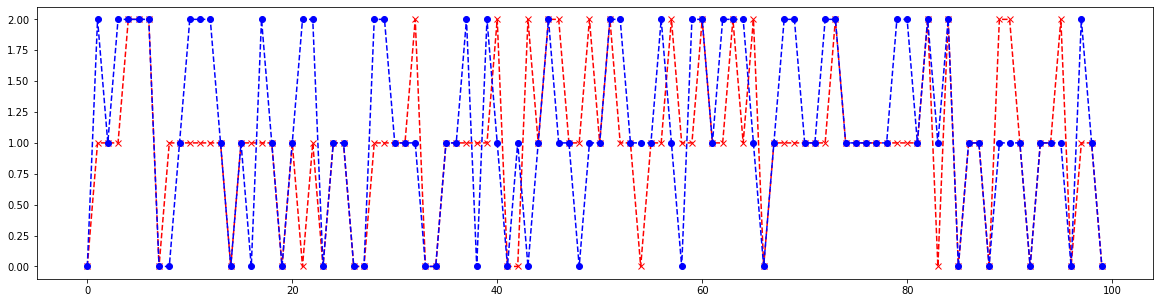

In [20]:
df2=pd.DataFrame()
df2['y_test']=y_test
df2['predicted']=predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20,5))
plt.plot(df2['predicted'][:100],marker='x',linestyle='dashed',color='red')
plt.plot(df2['y_test'][:100],marker='o',linestyle='dashed',color='b')
plt.show()